<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/241004_%EA%B3%BC%EC%A0%9C_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06. 토픽 모델링 - 20 뉴스그룹**

텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법. - ex. 토픽 모델링

* 토픽 모델링 : 문서 집합에 숨어 있는 주제를 찾아내는 것. 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.

  * LSA(Latent Semantic Analysis)
  * LDA(Latent Dirichlet Allocation)

20 뉴스그룹 데이터세트 주제 : 'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware1, 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.Christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'

이 중 모터사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용한다.

사이킷런은 `LatentDirichletAllocation` 클래스로 LDA 기반의 토픽 모델링을 제공한다.

1. `fetch_20newsgroups()` API의 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고 추출한다.
2. 텍스트를 Count 기반으로 벡터화 변환한다(LDA는 Count 기반 벡터화만 사용한다).
* `max_features=1000`으로 word 피처의 개수 제한
  * 생성할 피처(단어 또는 n-그램)의 최대 개수를 설정
    * 차원 축소
      * 과적합 방지: 너무 많은 피처가 있으면 모델이 학습 데이터에 과적합될 위험이 높아진다.
      * 계산 효율성: 피처 수가 줄어들면 모델 훈련과 예측에 소요되는 시간이 단축된다.
    * 노이즈 감소
      * 불필요한 단어 제거: 자주 사용되지 않는 단어는 일반적으로 정보가 적거나 노이즈가 될 수 있다.
    * 데이터 특성 고려 : 특정 도메인에서는 특정 단어들이 더 중요할 수 있다.
* `ngram_range` (1, 2)
  * `ngram_range` 옵션은 단어의 n-그램(연속된 n개의 단어 시퀀스)의 범위를 설정하는 데 사용된다. 예를 들어, `ngram_range=(1, 2)`로 설정하면, 단어 단위의 1-그램(단일 단어)과 2-그램(두 단어의 조합)이 모두 포함된 피처를 생성한다.
    * 1-그램: 각 단어를 개별적으로 사용.
    * 2-그램: 두 단어의 조합을 사용 (예: "좋은 날").

이렇게 n-그램을 사용하면 텍스트 데이터에서 더 많은 정보를 포착할 수 있어, 모델의 성능을 향상시킬 수 있습니다.
* `max_df` : 특정 단어가 문서 집합에서 나타나는 비율을 기준으로 해당 단어를 필터링하는 데 사용됩니다. 0.5로 설정할 경우, 전체 문서의 50% 이상에서 나타나는 단어는 제외됩니다. 예를 들어, 100개의 문서가 있을 때, 50개 이상의 문서에 등장하는 단어는 피처에서 제거됩니다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출
cats=['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
      'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df=fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                           categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용한다.
count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                           ngram_range=(1, 2))
feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


`feat_vect` : 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터.

토픽의 개수는 뉴스그룹에서 추출한 주제와 동일하게 8개로 정한다.

`LatentDirichletAllocation` 클래스의 `n_components` 파라미터를 이용해 이 토픽 개수를 조정한다(`ranom_state` 입력).

In [ ]:
lda=LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

fitting을 하면 `LatentDirichletAllocation` 객체는 `components_` 속성값을 가진다. `components_`는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다. `components_`의 형태와 속성값을 확인해보자.

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

`components_`는 array[8, 1000]으로 구성되어 있다. 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다. 즉, `components_array`의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처와 Topic #0의 연관도를 가지고 있다. `lda_model.components_` 값만으로는 각 토픽별 word 연관도를 보기가 어렵다. `display_topics()` 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열해보자.

In [ ]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes=topic.argsort()[::-1]
    top_indexes=topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat=' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names=count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)


Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


* Topic #0 : 일부 불분명안 주제어들이 있지만 주로 의학에 관련된 주제어가 추출된다.
* Topic #1 : 명확하지 않고 일반적인 단어가 주를 이루고 있다.
* Topic #2 : 컴퓨터 그래픽스 영역의 주제어가 다수 포함되어 있다.
* Topic #3 : 일반적인 단어로 주제어가 추출됐다.
* Topic #4 : 명확하게 중동 영역의 주제어가 추출됐다.
* Topic #5 : 일부 컴퓨터 그래픽스 영역의 주제어를 포함하고 있지만, 전반적인 컴퓨터 관련 용어들을 가지고 있어서 8개 토픽 중 하나로 매핑하기는 어렵다.
* Topic #6 : 명확하게 기독교 관련 주제어
* Topic #7 : 윈도우 운영체제와 관련된 주제어

## **08. 문서 유사도**

1. **문서 유사도 측정 방법 - 코사인 유사도**
문서와 문서 간의 유사도 비교는 코사인 유사도를 사용한다.

* 코사인 유사도 : 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다. 즉, 두 벡터의 사잇각을 구해 얼마나 유사한지 수치로 구한 값이다.

**두 벡터의 사잇각**

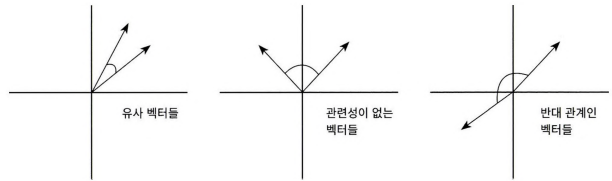

두 벡터 A와 B의 코사인 값은 두 벡터 A와 B의 내적을 이용하여 구한다.

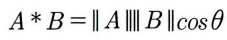

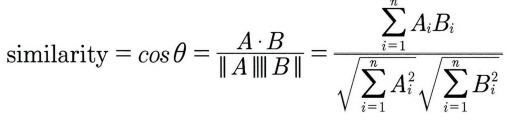

**코사인 유사도가 문서의 유사도 비교에 가장 많이 사용하는 이유** : 문서를 피처 벡터화 변환하면 차원이 큰 희소 행렬이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽다. 또한 문서가 매우 긴 경우 단어의 빈도수도 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.

예를 들어 A 문서에서 '머신러닝'이라는 단어가 5번 언급되고 B 문서에서는 3번 언급됐을 때 A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 쉽게 판단해서는 안 된다. A 문서가 B 문서보다 10배 이상 크다면 오히려 B 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 판단할 수 있다.

간단한 문서에 대해 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해 보자.

1. 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 `cos_similarity()` 함수 작성

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product=np.dot(v1, v2)
  l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity=dot_product/l2_norm

  return similarity

2. `doc_list`로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list=['if you take the blue pill, the story ends',
          'if you take the red pill, you stay in Wonderland',
          'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


3. 반환된 행렬은 희소 행렬이므로 앞에서 작성한 `cos_similarity()` 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환한다.

`feature_vect_dense[0]`은 `doc_list` 첫 번째 문서의 피처 벡터화이며, `feature_vect_dense[1]`은 `doc_list` 두 번째 문서의 피처 벡터화이다.

4. 위에서 작성한 `cos_similarity()` 함수를 이용해 두 개의 문서 유사도를 측정한다.

In [ ]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense=feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1=np.array(feature_vect_dense[0]).reshape(-1, )
vect2=np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


5. 첫 번째 문장과 세 번째 문장, 두 번째 문장과 세 번째 문장의 유사도 측정

In [ ]:
vect1=np.array(feature_vect_dense[0]).reshape(-1, )
vect3=np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple=cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2=np.array(feature_vect_dense[1]).reshape(-1, )
vect3=np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple=cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공한다.

cosine_similarity() 함수는 두 개의 입력 파라미터를 받는다. 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬이다.

cosine_similarity()는 희소 행렬, 밀집 행렬 모두 가능하며, 행렬 또는 배열 모두 가능하다. 따라서 앞서 만든 cos_similarity() 함수와 같이 별도의 작업이 필요 없다.

첫 번째 문서와 비교해 첫 번째 문서(자신), 두 번째, 세 번째 문서의 유사도를 측정해보자.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


cosine_similarity()는 쌍으로 코사인 유사도 값을 제공할 수 있다. 모든 개별 문서에 쌍으로 코사인 유사도 값을 계산한다. 즉, 첫 번째 문서와 두, 세 번째 문서의 코사인 유사도, 두 번째 문서와 첫, 세 번째 문서의 코사인 유사도, 세 번째 문서와 첫, 두 번째 문서의 코사인 유사도를 ndarray 형태로 제공한다.

In [ ]:
similarity_simple_pair=cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape : ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape :  (3, 3)


cosine_similarity()의 반환 값은 (3, 3) 형태의 ndarray이다. 첫 번째 로우는 1번 문서와 2, 3번 문서의 코사인 유사도, 두 번째 로우는 2번 문서와 1, 3번 문서의 코사인 유사도, 세 번째 로우는 3번 문서와 1, 2번 문서의 코사인 유사도를 나타낸다.

**Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path=r'/content/drive/MyDrive/24-1/ESAA/과제/OpinosisDataset1.0/topics'
all_files=glob.glob(os.path.join(path, '*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
  df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_=file_.split('/')[-1]
  filename=filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename' : filename_list, 'opinion_text' : opinion_text})
tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                           ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster=KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아본다.

문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다. 이렇게 각 문서가 피처 벡터화된 데이터를 cosine_simularity()를 이용해 상호 비교해 유사도를 확인한다.

1. 호텔을 주제로 군집화된 데이터를 먼저 추출한다.
2. 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출한다. 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화를 수행하지 않고, 바로 위에서 TfidfVectorizer로 만들어진 데이터에서 그대로 추출한다.

DataFrame 객체 변수인 document_df에서 먼저 호텔로 군집화된 문서의 인덱스를 추출한다. 이렇게 추출된 인덱스를 그대로 이용해 TfidfVectorizer 객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출한다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes=document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링된 문서들의 DataFrame Index : ', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname=document_df.iloc[hotel_indexes[0]]['filename']
print('#### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''
similarity_pair=cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링된 문서들의 DataFrame Index :  Index([1, 5, 6, 8, 14, 18, 20, 22, 28, 42, 43], dtype='int64')
#### 비교 기준 문서명 rooms_swissotel_chicago 와 타 문서 유사도####
[[1.         0.77312013 0.86779235 0.2790587  0.10470943 0.11313189
  0.21975321 0.22029855 0.32619948 0.24123696 0.25016153]]


단순히 숫자로만 표시돼서 직관적으로 유사도를 파악하기 어렵다. 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화해 보자. cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원을 변경한다.

가장 유사도가 큰 파일명 및 유사도 :
 filename      rooms_bestwestern_hotel_sfo
similarity                       0.867792
Name: 6, dtype: object


Text(0.5, 1.0, 'rooms_swissotel_chicago')

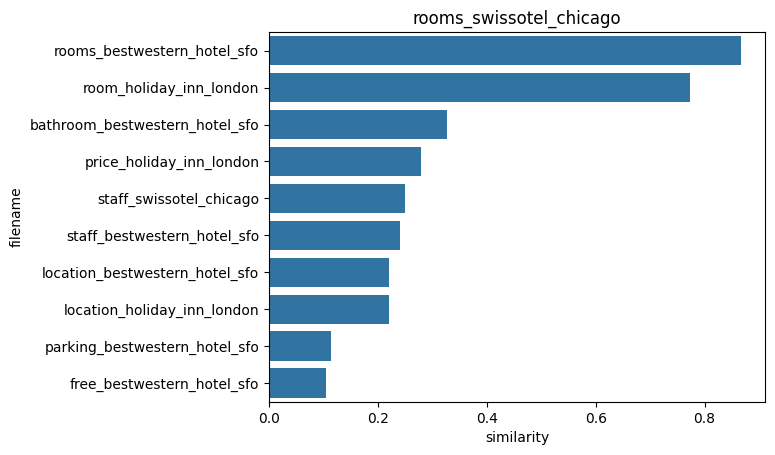

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index=similarity_pair.argsort()[:, ::-1]
sorted_index=sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도 :\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

첫 번째 문서인 샌프란시스코의 베스트 웨스턴 호텔 화장실 리뷰인 bathroom_bestwestern_hotel_sfo와 가장 비슷한 문서는 room_holidaty_inn_london이다. 약 0.514인 코사인 유사도 값을 나타내고 있다.

## **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**
파이썬 기반의 한글 형태소 패키지 KoNLPy

한글 언어 처리는 영어 등의 라틴어 처리보다 어렵다. 주된 원인은 '띄어쓰기'와 '다양한 조사' 때문이다.

조사는 주어나 목적어를 위해 추가되며, 경우의 수가 많기 때문에 어근 추출(Stemming/Lemmatization) 등의 전처리 시 제거하기 까다롭다.

**KoNLPy** : 파이썬의 대표적 한글 형태소 패키지.
* 형태소 : 단어로서 의미를 가지는 최소 단위

형태소 분석은 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업을 지칭한다.

꼬꼬마(Kkma), 한나눔(Hannanum), Komoran, 은전한닢 프로젝트(Mecab -> 윈도우 환경에서는 구동되지 않음), Twitter

1. 데이터 로딩

https://github.com/e9t/nsmc

Ratings_train.txt 파일은 탭(\t)으로 칼럼이 분리돼 있으므로 read_csv()의 sep 파라미터를 '\t'로 설정해 DataFrame으로 생성한다. 한글로 된 문서를 DataFrame으로 로딩할 때 인코딩 이슈가 발생할 수 있다. pd.read_csv() 시 encoding을 cp949로 설정한다.

In [ ]:
import pandas as pd

train_df=pd.read_csv('/content/drive/MyDrive/24-1/ESAA/과제/Naver/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


0과 1의 비율이 어느 한 쪽으로 치우치지 않고 균등한 분포를 나타내고 있다.

1. train_df의 경우 리뷰 텍스트를 가지는 'document' 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다.
2. 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환한다.
3. 테스트 데이터 세트의 경우도 파일을 로딩하고 동일한 데이터 가공을 수행한다.

In [ ]:
import re

train_df=train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document']=train_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df=pd.read_csv('/content/drive/MyDrive/24-1/ESAA/과제/Naver/ratings_test.txt', sep='\t', encoding='utf-8')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x : re.sub(r'\d+', ' ', x))

# id 칼럼 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

4. TF-IDF 방식으로 단어를 벡터화한다.

각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화한다. 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용한다. Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환한다. 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수를 tw_tokenizer()라는 이름으로 생성한다. 이 tw_tokenizer() 함수는 뒤에서 사이킷런의 TfidfVectorizer 클래스의 tokenizer로 사용된다.

In [ ]:
!pip install konlpy JPype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.6 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Twitter

twitter=Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko=twitter.morphs(text)
  return tokens_ko

사이킷런의 TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성한다. tokenizer는 위에서 만든 tw_tokenizer() 함수를 이용한다.
* ngram (1, 2)
* min_df=3
* max_df 상위 90%

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range (1, 2)
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

5. 로지스틱 회귀를 이용해 분류 기반의 감성 분석을 수행한다. 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용한다.

In [ ]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf=LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params={'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


테스트 데이터 세트를 이용해 최종 감성 분석 예측을 수행한다.

테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 한다. 그래야만 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer로 변환할 피처 개수가 같아진다. 학습 데이터에 사용된 TfidfVectorizer 객체 변수인 tfidf_vect를 이용해 transform()을 테스트 데이터의 document 칼럼에 수행한다.

In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 : ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도 :  0.86172
